# Analyzing, found errors based on **OWASP, OAS** traced by ***Spectral***

## Read and Explore

In [ ]:
import pandas as pd

df = pd.read_json('error_openapi_my_ruleset_f.json')

In [ ]:
df.columns

Index(['code', 'path', 'message', 'severity', 'range', 'source'], dtype='object')

In [ ]:
df = df.drop('source', axis=1)  # remove file:'source'

In [ ]:
df = df[['code', 'severity', 'message', 'path', 'range']]

In [ ]:
df.head()

,code,severity,message,path,range
0,oas3-api-servers,1,"OpenAPI ""servers"" must be present and non-empt...",[],"{'start': {'line': 0, 'character': 0}, 'end': ..."
1,operation-operationId,1,"Operation must have ""operationId"".","[paths, /connect/token, post]","{'start': {'line': 17, 'character': 9}, 'end':..."
2,operation-tag-defined,1,Operation tags must be defined in global tags.,"[paths, /connect/token, post, tags, 0]","{'start': {'line': 19, 'character': 10}, 'end'..."
3,owasp:api4:2023-string-limit,0,"Schema of type string must specify maxLength, ...","[paths, /connect/token, post, requestBody, con...","{'start': {'line': 28, 'character': 27}, 'end'..."
4,owasp:api4:2023-string-restricted,1,"Schema of type string should specify a format,...","[paths, /connect/token, post, requestBody, con...","{'start': {'line': 28, 'character': 27}, 'end'..."


## Assign Severity Code & targetted standards

In [ ]:
severity = {  # Error Codes
    "error": 0,
    "warning": 1,
    "infos": 2,
    "hints": 3
}
standards = {'oas': 0, 'owasp': 0, 'onepoint': 0, 'others': 0}  # Planned

In [ ]:
df['severity'] = df['severity'].map({0: 'error', 1: 'warning', 2: 'infos', 3: 'hints'})

In [ ]:
df.head()

,code,severity,message,path,range
0,oas3-api-servers,warning,"OpenAPI ""servers"" must be present and non-empt...",[],"{'start': {'line': 0, 'character': 0}, 'end': ..."
1,operation-operationId,warning,"Operation must have ""operationId"".","[paths, /connect/token, post]","{'start': {'line': 17, 'character': 9}, 'end':..."
2,operation-tag-defined,warning,Operation tags must be defined in global tags.,"[paths, /connect/token, post, tags, 0]","{'start': {'line': 19, 'character': 10}, 'end'..."
3,owasp:api4:2023-string-limit,error,"Schema of type string must specify maxLength, ...","[paths, /connect/token, post, requestBody, con...","{'start': {'line': 28, 'character': 27}, 'end'..."
4,owasp:api4:2023-string-restricted,warning,"Schema of type string should specify a format,...","[paths, /connect/token, post, requestBody, con...","{'start': {'line': 28, 'character': 27}, 'end'..."


## Error Codes (OWASP, OAS, ..) with count https://owasp.org/Top10/
### Total Codes, Total Severities

In [ ]:
df['code'].value_counts()  # https://owasp.org/Top10/

code
owasp:api4:2023-string-limit                  17
owasp:api4:2023-integer-limit                 16
owasp:api4:2023-string-restricted             14
owasp:api4:2023-rate-limit-responses-429      10
owasp:api8:2023-define-error-responses-401    10
owasp:api8:2023-define-error-responses-500    10
owasp:api4:2023-rate-limit                     5
operation-tag-defined                          5
operation-operationId                          5
owasp:api8:2023-define-error-validation        5
owasp:api4:2023-array-limit                    5
owasp:api1:2023-no-numeric-ids                 2
oas3-valid-schema-example                      2
oas3-api-servers                               1
Name: count, dtype: int64

In [ ]:
df['severity'].value_counts()

severity
warning    60
error      47
Name: count, dtype: int64

## Severity Count (Error, Warning, Infos, Hints)

In [ ]:
total_rows = len(df.code)
total_codes_unique = len(df['code'].unique())
total_severities_unique = len(df['severity'].unique())
# unique severity
print(total_rows, total_codes_unique, total_severities_unique)

107 14 2


In [ ]:
dict_severity = df['severity'].value_counts().to_dict()
print(dict_severity.keys())

dict_keys(['warning', 'error'])


In [ ]:
# Severity default is already defined
errors = dict_severity.get('error', 0)
warnings = dict_severity.get('warning', 0)
infos = dict_severity.get('infos', 0)
hints = dict_severity.get('hints', 0)
print(errors, warnings, infos, hints)

47 60 0 0


In [ ]:
oas, oas_warning, oas_error, oas_hints, oas_infos = 0, 0, 0, 0, 0  # initial raw values
owasp, owasp_warning, owasp_error, owasp_hints, owasp_infos = 0, 0, 0, 0, 0
onepoint, onepoint_warning, onepoint_error, onepoint_hints, onepoint_infos = 0, 0, 0, 0, 0
others, others_warning, others_error, others_hints, others_infos = 0, 0, 0, 0, 0

In [ ]:
standard_table = df[['code', 'severity']]

In [ ]:
def count_standards_length(code, pattern):
    return standard_table[
        (standard_table['severity'].str.contains(pattern, case=False)) &
        (standard_table['code'].str.contains(code, case=False))
        ]


In [ ]:
if errors > 0:
    oas_error = len(count_standards_length('oas', 'error'))
    owasp_error = len(count_standards_length('owasp', 'error'))
    onepoint_error = len(count_standards_length('onepoint', 'error'))
    other_error = len(count_standards_length('operation', 'error'))

if warnings > 0:
    oas_warning = len(count_standards_length('oas', 'warning'))
    owasp_warning = len(count_standards_length('owasp', 'warning'))
    onepoint_warning = len(count_standards_length('onepoint', 'warning'))
    others_warning = len(count_standards_length('operation', 'warning'))

if infos > 0:
    oas_infos = len(count_standards_length('oas', 'infos'))
    owasp_infos = len(count_standards_length('owasp', 'infos'))
    onepoint_infos = len(count_standards_length('onepoint', 'infos'))
    others_infos = len(count_standards_length('operation', 'infos'))

if hints > 0:
    oas_hints = len(count_standards_length('oas', 'hints'))
    owasp_hints = len(count_standards_length('owasp', 'hints'))
    onepoint_hints = len(count_standards_length('onepoint', 'hints'))
    others_hints = len(count_standards_length('operation', 'hints'))

standard_non_compliance = (oas + owasp + others + onepoint)

In [ ]:
final = {}
final['total_issues'] = total_rows

final['total_errors'] = errors
final['total_warnings'] = warnings
final['total_hints'] = hints
final['total_infos'] = infos

final['standard_non_compliance'] = {}

final['standard_non_compliance']['oas'] = {}
final['standard_non_compliance']['oas']['total'] = (oas_error + oas_warning + oas_infos + oas_hints)
final['standard_non_compliance']['oas']['error'] = oas_error
final['standard_non_compliance']['oas']['warning'] = oas_warning
final['standard_non_compliance']['oas']['infos'] = oas_infos
final['standard_non_compliance']['oas']['hints'] = oas_hints

final['standard_non_compliance']['owasp'] = {}
final['standard_non_compliance']['owasp']['total'] = (owasp_error + owasp_warning + owasp_hints + owasp_infos)
final['standard_non_compliance']['owasp']['error'] = owasp_error
final['standard_non_compliance']['owasp']['warning'] = owasp_warning
final['standard_non_compliance']['owasp']['infos'] = owasp_infos
final['standard_non_compliance']['owasp']['hints'] = owasp_hints

final['standard_non_compliance']['onepoint'] = {}
final['standard_non_compliance']['onepoint']['total'] = (
        onepoint_error + onepoint_warning + onepoint_hints + onepoint_infos)
final['standard_non_compliance']['onepoint']['error'] = onepoint_error
final['standard_non_compliance']['onepoint']['warning'] = onepoint_warning
final['standard_non_compliance']['onepoint']['infos'] = onepoint_infos
final['standard_non_compliance']['onepoint']['hints'] = onepoint_hints

final['standard_non_compliance']['others'] = {}
final['standard_non_compliance']['others']['total'] = (others_error + others_warning + others_hints + others_infos)
final['standard_non_compliance']['others']['error'] = others_error
final['standard_non_compliance']['others']['warning'] = others_warning
final['standard_non_compliance']['others']['infos'] = others_infos
final['standard_non_compliance']['others']['hints'] = others_hints

final['standard_non_compliance']['total'] = final['standard_non_compliance']['oas']['total'] + \
                                            final['standard_non_compliance']['owasp']['total']


In [ ]:
type(final)

dict

In [ ]:
final

{'total_issues': 107,
 'total_errors': 47,
 'total_warnings': 60,
 'total_hints': 0,
 'total_infos': 0,
 'standard_non_compliance': {'oas': {'total': 3,
   'error': 2,
   'warning': 1,
   'infos': 0,
   'hints': 0},
  'owasp': {'total': 94, 'error': 45, 'warning': 49, 'infos': 0, 'hints': 0},
  'onepoint': {'total': 0, 'error': 0, 'warning': 0, 'infos': 0, 'hints': 0},
  'others': {'total': 10, 'error': 0, 'warning': 10, 'infos': 0, 'hints': 0},
  'total': 97}}

In [ ]:
plotData = pd.DataFrame(
    [final['total_errors'], final['total_warnings'], final['total_hints'], final['total_infos']],
    columns=['Issues'],
    index=['Errors', 'Warnings', 'Hints', 'Infos'])

In [ ]:
plotData

,Issues
Errors,47
Warnings,60
Hints,0
Infos,0


In [ ]:
plotData2 = pd.DataFrame(
    [
        # final['total_issues'],
        final['standard_non_compliance']['total'],
        final['total_issues'] - final['standard_non_compliance']['total']],
    columns=['issues'],
    index=[
        # 'Total',
        'Standard NoN Compliance', 'Standard Compliance'])

In [ ]:
plotData2

,issues
Standard NoN Compliance,97
Standard Compliance,10


In [ ]:
plotData3 = pd.DataFrame(
    [
        final['standard_non_compliance']['oas']['error'],
        final['standard_non_compliance']['owasp']['error'],
        final['standard_non_compliance']['onepoint']['error'],
        final['standard_non_compliance']['others']['error'],
        final['standard_non_compliance']['oas']['warning'],
        final['standard_non_compliance']['owasp']['warning'],
        final['standard_non_compliance']['onepoint']['warning'],
        final['standard_non_compliance']['others']['warning'],
    ],
    columns=['Issues'],
    index=[
        'OAS Errors', 'OWASP Errors', 'OnePoint Errors', 'Other Errors',
        'OAS Warning', 'OWASP Warnings', 'OnePoint Warnings', 'Other Warnings'
    ]
)

In [ ]:
plotData3

,Issues
OAS Errors,2
OWASP Errors,45
OnePoint Errors,0
Other Errors,0
OAS Warning,1
OWASP Warnings,49
OnePoint Warnings,0
Other Warnings,10


In [ ]:
final

{'total_issues': 107,
 'total_errors': 47,
 'total_warnings': 60,
 'total_hints': 0,
 'total_infos': 0,
 'standard_non_compliance': {'oas': {'total': 3,
   'error': 2,
   'warning': 1,
   'infos': 0,
   'hints': 0},
  'owasp': {'total': 94, 'error': 45, 'warning': 49, 'infos': 0, 'hints': 0},
  'onepoint': {'total': 0, 'error': 0, 'warning': 0, 'infos': 0, 'hints': 0},
  'others': {'total': 10, 'error': 0, 'warning': 10, 'infos': 0, 'hints': 0},
  'total': 97}}

## Classify

In [ ]:
classification_table = df[['code', 'severity']]

### API Security Risk

#### https://www.veracode.com/blog/research/breaking-down-owasp-top-10-api-security-risks-2023-what-changed-2019
#### https://www.akto.io/blog/whats-changed-in-owasp-top-10-2023

#### **Standard Non-Compliance**
#### **Syntax**
#### **Documentation**
#### **Code Generation**
#### **Other**
#### **Critical**
**Total number of Issues**



In [ ]:
classification_table

,code,severity
0,oas3-api-servers,warning
1,operation-operationId,warning
2,operation-tag-defined,warning
3,owasp:api4:2023-string-limit,error
4,owasp:api4:2023-string-restricted,warning
...,...,...
102,owasp:api4:2023-integer-limit,error
103,owasp:api4:2023-string-limit,error
104,owasp:api4:2023-string-restricted,warning
105,owasp:api4:2023-string-limit,error


In [ ]:
def classify(code, pattern):
    return classification_table[
        (classification_table['severity'].str.contains(code, case=False)) &
        (classification_table['code'].str.contains(pattern, case=False))
        ]

### Map the error count
### OWASP: Critical, High Warning, Warning

In [ ]:
critical_error_owasp = classify('error', r"^owasp:api[12345]{1}")  # OWASP
high_warning_owasp = classify('warning', r"^owasp:api[^12345]{1}")
len(critical_error_owasp), len(high_warning_owasp)  #, len(warning_owasp)

(45, 25)

In [ ]:
owasp_total = final['standard_non_compliance']['owasp']['total']

In [ ]:
warning_owasp = owasp_total - len(high_warning_owasp) - len(critical_error_owasp)
if warning_owasp < 0:
    warning_owasp = 0
warning_owasp

24

In [ ]:
# Assign to final data

final['standard_non_compliance']['owasp']['critical'] = len(critical_error_owasp)
final['standard_non_compliance']['owasp']['high_warning'] = len(high_warning_owasp)
final['standard_non_compliance']['owasp']['low_warning'] = warning_owasp

In [ ]:
# Validate

checkOWASP = len(critical_error_owasp) + warning_owasp + len(high_warning_owasp)
if checkOWASP == owasp_total:
    print('Pass OWASP')
else:
    print('Fail OWASP')

Pass OWASP


### OAS: Critical, High Warning, Warning


In [ ]:
critical_error_oas = classify('error', r"^oas")  # OAS
high_warning_oas = classify('warning', r"^oas?")
len(critical_error_oas), len(high_warning_oas)

(2, 1)

In [ ]:
oas_total = final['standard_non_compliance']['oas']['total']

In [ ]:
warning_oas = oas_total - len(high_warning_oas) - len(critical_error_oas)
if warning_oas < 0:
    warning_oas = 0
warning_oas

0

In [ ]:
# Assign to final data

final['standard_non_compliance']['oas']['critical'] = len(critical_error_oas)
final['standard_non_compliance']['oas']['high_warning'] = len(high_warning_oas)
final['standard_non_compliance']['oas']['low_warning'] = warning_oas

In [ ]:
# Validate

checkOAS = len(critical_error_oas) + warning_oas + len(high_warning_oas)
if checkOAS == oas_total:
    print('Pass OAS')
else:
    print('Fail OAS')

Pass OAS


### Others

In [ ]:
critical_error_other = classify('error', r"^(?!(owasp|oas)).*$")  # Others
high_warning_other = classify('warning', r"^(?!(owasp|oas)).*$")
len(critical_error_other), len(high_warning_other)

C:\Users\Onepoint\AppData\Local\Temp\ipykernel_121036\1522797524.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (classification_table['code'].str.contains(pattern, case=False))


(0, 10)

In [ ]:
other_total = final['standard_non_compliance']['others']['total']

In [ ]:
warning_other = other_total - len(high_warning_other) - len(critical_error_other)
if warning_other < 0:
    warning_other = 0
warning_other

0

In [ ]:
# Assign to final data

final['standard_non_compliance']['others']['critical'] = len(critical_error_other)
final['standard_non_compliance']['others']['high_warning'] = len(high_warning_other)
final['standard_non_compliance']['others']['low_warning'] = warning_other

In [ ]:
# Validate

checkOthers = len(critical_error_other) + warning_other + len(high_warning_other)
if checkOthers == other_total:
    print('Pass Others')
else:
    print('Fail Others')

Pass Others


In [ ]:
final

{'total_issues': 107,
 'total_errors': 47,
 'total_warnings': 60,
 'total_hints': 0,
 'total_infos': 0,
 'standard_non_compliance': {'oas': {'total': 3,
   'error': 2,
   'warning': 1,
   'infos': 0,
   'hints': 0,
   'critical': 2,
   'high_warning': 1,
   'low_warning': 0},
  'owasp': {'total': 94,
   'error': 45,
   'warning': 49,
   'infos': 0,
   'hints': 0,
   'critical': 45,
   'high_warning': 25,
   'low_warning': 24},
  'onepoint': {'total': 0, 'error': 0, 'warning': 0, 'infos': 0, 'hints': 0},
  'others': {'total': 10,
   'error': 0,
   'warning': 10,
   'infos': 0,
   'hints': 0,
   'critical': 0,
   'high_warning': 10,
   'low_warning': 0},
  'total': 97}}

## Major HTTP code, methods

In [ ]:
http_verbs_methods = df['path'].apply(lambda x: x[2] if isinstance(x, list) and len(x) >= 3 else None)

In [ ]:
# remove NONE
http_verbs_methods = http_verbs_methods.drop(0)

In [ ]:
http_verbs_methods

1               post
2               post
3               post
4               post
5               post
           ...      
102    LedgerAccount
103      SOAPRequest
104      SOAPRequest
105     SOAPResponse
106     SOAPResponse
Name: path, Length: 106, dtype: object

In [ ]:
# HTTP Code - Count
https = http_verbs_methods.value_counts().to_dict()

In [ ]:
final['total_critical'] = len(critical_error_owasp) + len(critical_error_oas) + len(critical_error_other)
final['total_high_warning'] = len(high_warning_owasp) + len(high_warning_oas) + len(high_warning_other)
final['total_low_warning'] = warning_owasp + warning_oas + warning_other
final['HTTP_POST'] = https.get('post', 0)
final['HTTP_GET'] = https.get('get', 0)
final['HTTP_PUT'] = https.get('put', 0)
final['HTTP_PATCH'] = https.get('patch', 0)
final['HTTP_DELETE'] = https.get('delete', 0)
final['HTTP_HEAD'] = https.get('head', 0)
final['HTTP_OPTIONS'] = https.get('options', 0)

In [ ]:
final

{'total_issues': 107,
 'total_errors': 47,
 'total_warnings': 60,
 'total_hints': 0,
 'total_infos': 0,
 'standard_non_compliance': {'oas': {'total': 3,
   'error': 2,
   'warning': 1,
   'infos': 0,
   'hints': 0,
   'critical': 2,
   'high_warning': 1,
   'low_warning': 0},
  'owasp': {'total': 94,
   'error': 45,
   'warning': 49,
   'infos': 0,
   'hints': 0,
   'critical': 45,
   'high_warning': 25,
   'low_warning': 24},
  'onepoint': {'total': 0, 'error': 0, 'warning': 0, 'infos': 0, 'hints': 0},
  'others': {'total': 10,
   'error': 0,
   'warning': 10,
   'infos': 0,
   'hints': 0,
   'critical': 0,
   'high_warning': 10,
   'low_warning': 0},
  'total': 97},
 'total_critical': 47,
 'total_high_warning': 36,
 'total_low_warning': 24,
 'HTTP_POST': 36,
 'HTTP_GET': 34,
 'HTTP_PUT': 0,
 'HTTP_PATCH': 0,
 'HTTP_DELETE': 0,
 'HTTP_HEAD': 0,
 'HTTP_OPTIONS': 0}

In [ ]:
import json

json_string = json.dumps(final)
with open("governance_report.json", "w") as f:
    f.write(json_string)

print(json_string)

{"total_issues": 107, "total_errors": 47, "total_warnings": 60, "total_hints": 0, "total_infos": 0, "standard_non_compliance": {"oas": {"total": 3, "error": 2, "warning": 1, "infos": 0, "hints": 0, "critical": 2, "high_warning": 1, "low_warning": 0}, "owasp": {"total": 94, "error": 45, "warning": 49, "infos": 0, "hints": 0, "critical": 45, "high_warning": 25, "low_warning": 24}, "onepoint": {"total": 0, "error": 0, "warning": 0, "infos": 0, "hints": 0}, "others": {"total": 10, "error": 0, "warning": 10, "infos": 0, "hints": 0, "critical": 0, "high_warning": 10, "low_warning": 0}, "total": 97}, "total_critical": 47, "total_high_warning": 36, "total_low_warning": 24, "HTTP_POST": 36, "HTTP_GET": 34, "HTTP_PUT": 0, "HTTP_PATCH": 0, "HTTP_DELETE": 0, "HTTP_HEAD": 0, "HTTP_OPTIONS": 0}


# Reporting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

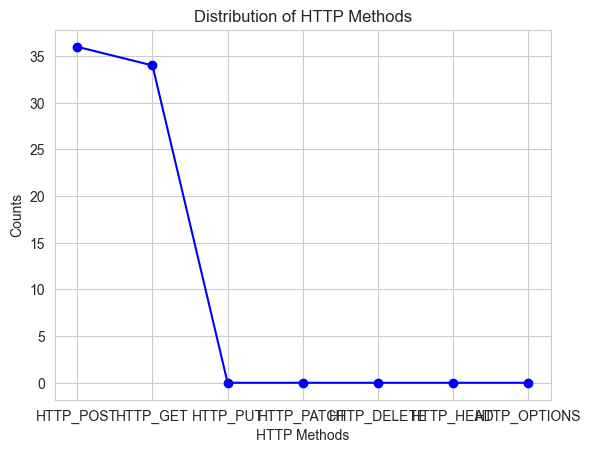

In [ ]:
# Data from governance_report.json
http_methods = {
    "HTTP_POST": 36,
    "HTTP_GET": 34,
    "HTTP_PUT": 0,
    "HTTP_PATCH": 0,
    "HTTP_DELETE": 0,
    "HTTP_HEAD": 0,
    "HTTP_OPTIONS": 0,
}

methods = list(http_methods.keys())
counts = list(http_methods.values())

plt.plot(methods, counts, marker="o", linestyle="-", color="b")
plt.title("Distribution of HTTP Methods")
plt.xlabel("HTTP Methods")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

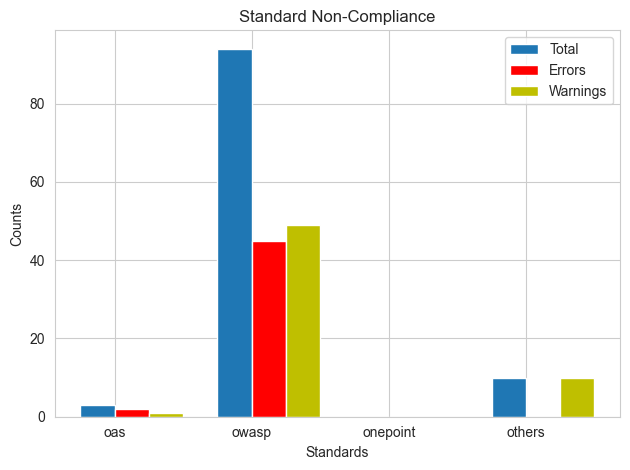

In [ ]:
compliance_data = {
    "oas": {
        "total": 3,
        "error": 2,
        "warning": 1,
        "infos": 0,
        "hints": 0,
        "critical": 2,
        "high_warning": 1,
        "low_warning": 0,
    },
    "owasp": {
        "total": 94,
        "error": 45,
        "warning": 49,
        "infos": 0,
        "hints": 0,
        "critical": 45,
        "high_warning": 25,
        "low_warning": 24,
    },
    "onepoint": {"total": 0, "error": 0, "warning": 0, "infos": 0, "hints": 0},
    "others": {
        "total": 10,
        "error": 0,
        "warning": 10,
        "infos": 0,
        "hints": 0,
        "critical": 0,
        "high_warning": 10,
        "low_warning": 0,
    },
}

labels = list(compliance_data.keys())
total = [compliance_data[key]["total"] for key in compliance_data]
errors = [compliance_data[key]["error"] for key in compliance_data]
warnings = [compliance_data[key]["warning"] for key in compliance_data]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, total, width, label="Total")
rects2 = ax.bar(x + width / 2, errors, width, label="Errors", color="r")
rects3 = ax.bar(x + 1.5 * width, warnings, width, label="Warnings", color="y")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Standards")
ax.set_ylabel("Counts")
ax.set_title("Standard Non-Compliance")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

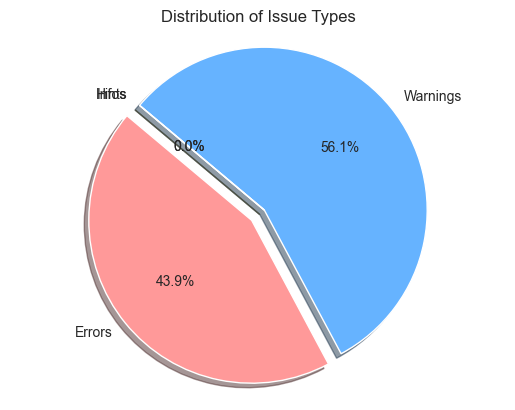

In [ ]:
data = {
    "total_issues": 107,
    "total_errors": 47,
    "total_warnings": 60,
    "total_hints": 0,
    "total_infos": 0,
}

labels = ["Errors", "Warnings", "Hints", "Infos"]
sizes = [
    data["total_errors"],
    data["total_warnings"],
    data["total_hints"],
    data["total_infos"],
]
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
explode = (0.1, 0, 0, 0)  # explode the 1st slice

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
)
plt.title("Distribution of Issue Types")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import seaborn as sns

C:\Users\Onepoint\AppData\Local\Temp\ipykernel_121036\4269776864.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  http_methods_plot = sns.lineplot(


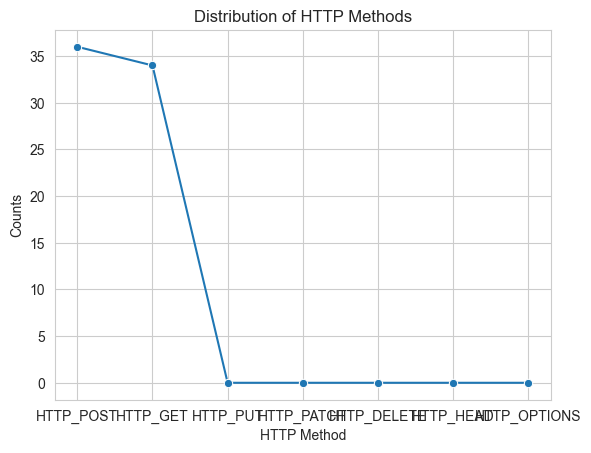

In [ ]:
# Data from governance_report.json
http_methods = {
    "HTTP_POST": 36,
    "HTTP_GET": 34,
    "HTTP_PUT": 0,
    "HTTP_PATCH": 0,
    "HTTP_DELETE": 0,
    "HTTP_HEAD": 0,
    "HTTP_OPTIONS": 0,
}

methods = list(http_methods.keys())
counts = list(http_methods.values())

# Create DataFrame
df_http_methods = pd.DataFrame({"HTTP Method": methods, "Counts": counts})

# Plot
http_methods_plot = sns.lineplot(
    x="HTTP Method",
    y="Counts",
    marker="o",
    data=df_http_methods,
    sort=False,
    palette="coolwarm",
)
http_methods_plot.set_title("Distribution of HTTP Methods")
plt.show()


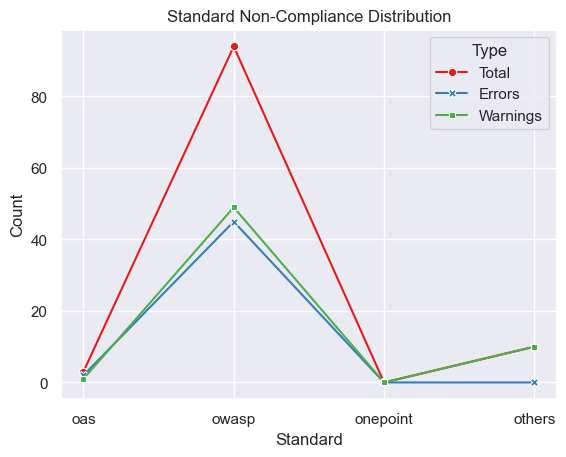

In [ ]:
# Data from governance_report.json
compliance_data = {
    "oas": {
        "total": 3,
        "error": 2,
        "warning": 1,
        "infos": 0,
        "hints": 0,
        "critical": 2,
        "high_warning": 1,
        "low_warning": 0,
    },
    "owasp": {
        "total": 94,
        "error": 45,
        "warning": 49,
        "infos": 0,
        "hints": 0,
        "critical": 45,
        "high_warning": 25,
        "low_warning": 24,
    },
    "onepoint": {"total": 0, "error": 0, "warning": 0, "infos": 0, "hints": 0},
    "others": {
        "total": 10,
        "error": 0,
        "warning": 10,
        "infos": 0,
        "hints": 0,
        "critical": 0,
        "high_warning": 10,
        "low_warning": 0,
    },
}

data_for_df = []
for key, value in compliance_data.items():
    data_for_df.append([key, value["total"], "Total"])
    data_for_df.append([key, value["error"], "Errors"])
    data_for_df.append([key, value["warning"], "Warnings"])

df_compliance = pd.DataFrame(data_for_df, columns=["Standard", "Count", "Type"])

# Plot
sns.set(style="darkgrid")

line_plot = sns.lineplot(
    x="Standard",
    y="Count",
    hue="Type",
    style="Type",
    markers=True,
    dashes=False,
    palette="Set1",
    data=df_compliance,
)
line_plot.set_title("Standard Non-Compliance Distribution")
plt.show()


C:\Users\Onepoint\AppData\Local\Temp\ipykernel_121036\2229872025.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Issue Type", y="Counts", data=df_issues, palette="muted")


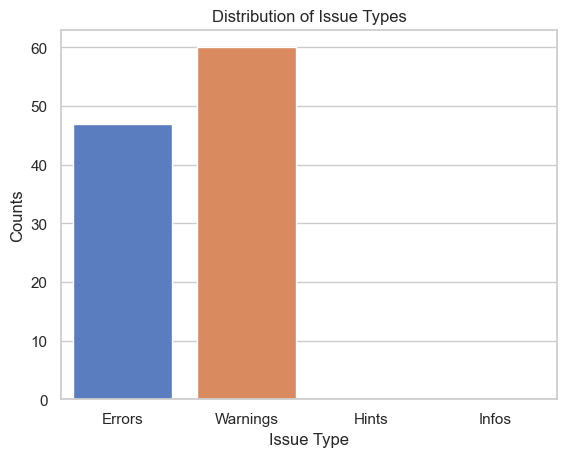

In [ ]:
# Data from governance_report.json
data = {
    "total_issues": 107,
    "total_errors": 47,
    "total_warnings": 60,
    "total_hints": 0,
    "total_infos": 0,
}

labels = ["Errors", "Warnings", "Hints", "Infos"]
counts = [
    data["total_errors"],
    data["total_warnings"],
    data["total_hints"],
    data["total_infos"],
]

# Create DataFrame
df_issues = pd.DataFrame({"Issue Type": labels, "Counts": counts})

# Plot
sns.set(style="whitegrid")
bar_plot = sns.barplot(x="Issue Type", y="Counts", data=df_issues, palette="muted")
bar_plot.set_title("Distribution of Issue Types")
plt.show()
